In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

np.random.seed(10)

In [35]:
n_tosses = 10 ** np.arange(1,6)

In [46]:
n_sims = 1000

summary = pd.DataFrame()
summary.index.name = 'no. tosses'

for n in n_tosses:
    summary.loc[n, 'any'] = 0
    summary.loc[n, 'end'] = 0
    
    for sim in range(n_sims):
        tmp = pd.DataFrame()
        tmp['toss'] = stats.bernoulli.rvs(p = 0.5, size = n)
        tmp['p_hat'] = tmp.toss.cumsum() / np.arange(1, len(tmp)+1)
        tmp['SE'] = 0.5 / np.sqrt(np.arange(1,len(tmp)+1))
        tmp['z'] = (tmp.p_hat - 0.5) / tmp.SE
        
        summary.loc[n, 'end'] += 1*(tmp.z.values[-1] > 1.645)
        summary.loc[n, 'any'] += 1*(tmp.z.max() > 1.645)


In [51]:
s = (100*summary/n_sims).reset_index().style.format("{:,.0f}", subset = ['no. tosses'])\
            .format("{:.2f}%", subset = ['any', 'end']).to_latex(hrules = True)

In [52]:
print(s)

\begin{tabular}{lrrr}
\toprule
 & no. tosses & any & end \\
\midrule
0 & 10 & 19.10% & 5.50% \\
1 & 100 & 31.40% & 4.60% \\
2 & 1,000 & 44.20% & 4.20% \\
3 & 10,000 & 53.30% & 4.50% \\
4 & 100,000 & 63.80% & 5.30% \\
\bottomrule
\end{tabular}



<Axes: xlabel='no. tosses'>

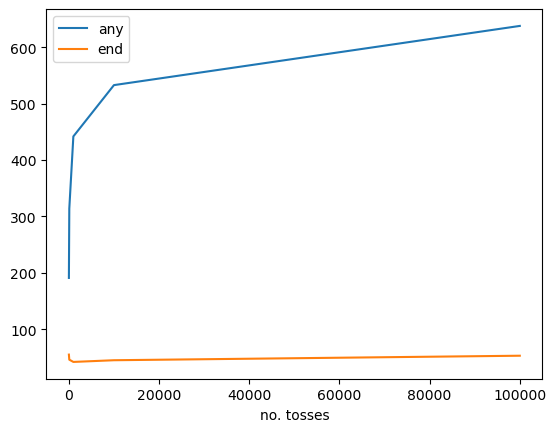

In [54]:
summary.plot()